In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
openCloseData=pd.read_csv("openCloseData[40cols].csv")
openCloseData.head()

,Unnamed: 0,PostId,UserId,Comment,Body,Title,Tags,Reputation,experienceInTime,WebsiteUrl,...,websiteUrlFilled,locationFilled,aboutMeFilled,profileImageUrlFilled,tagWeightSum,gunningFog,fleschReadingEase,daleChallReadabilityScore,smogIndex,colemanLiauIndex
0,0,21170255,5921,102,"<p>I tried to Google for this, but was (surpri...",Can anyone point me to (or post) an array of e...,<javascript><html><arrays><tags>,17527,1953,NaN,...,0,1,1,0,-207.161031,74.89,-88.22,14.35,0.0,10.18
1,1,38290647,1601251,102,<p>I am at a decision fork where i have to pic...,RESTful API with either Tomcat or Node.js?,<java><node.js><rest><tomcat><typescript>,151,1425,NaN,...,0,0,0,0,-536.990588,54.66,-31.38,12.43,0.0,11.45
2,2,6496114,52924,102,<p>Does anyone know of a good tool to test Sch...,Tool for testing Schema.org markup,<testing><markup><schema.org>,1639,900,http://www.agendarecife.com,...,1,1,1,0,-160.004636,18.80,37.64,8.35,0.0,24.66
3,3,25982771,1968462,102,"<p>The <a href=""http://www.postgresql.org/docs...",Inserting into simple Postgres views,<sql><postgresql>,2669,620,https://katrinahoffert.github.io/,...,1,1,1,1,-188.646160,46.32,-66.24,11.74,0.0,23.40
4,4,10142243,383479,102,<p>Which frameworks would you recommend for wr...,Frameworks for Unittests for Multithreading in...,<java><multithreading><unit-testing><concurrency>,245,648,NaN,...,0,0,0,0,-274.409048,21.25,45.43,8.34,0.0,9.47


In [3]:
print(openCloseData.shape)
openCloseData.drop(['Unnamed: 0'],inplace=True,axis=1)
print(openCloseData.shape)

(159996, 41)
(159996, 40)


In [4]:
openCloseData.columns

Index(['PostId', 'UserId', 'Comment', 'Body', 'Title', 'Tags', 'Reputation',
       'experienceInTime', 'WebsiteUrl', 'Location', 'AboutMe', 'Views',
       'Upvotes', 'Downvotes', 'ProfileImageUrl', 'tagCount', 'closed',
       'lowerUpperRatio', 'sentenceCount', 'firstLineLength', 'codeLength',
       'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'websiteUrlFilled', 'locationFilled',
       'aboutMeFilled', 'profileImageUrlFilled', 'tagWeightSum', 'gunningFog',
       'fleschReadingEase', 'daleChallReadabilityScore', 'smogIndex',
       'colemanLiauIndex'],
      dtype='object')

In [5]:
# closeData = openCloseData[80001:]
closeData = openCloseData[openCloseData['closed'] == 1]
closeData.shape

(79996, 40)

In [6]:
X = closeData.loc[:,['Reputation', 'experienceInTime', 'Views', 'Upvotes', 'Downvotes', 'tagCount',
       'lowerUpperRatio', 'sentenceCount', 'firstLineLength', 'codeLength', 'urlCount', 'SOUrlCount',
       'titleLengthInChars', 'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount', 'punctuationCount',
       'websiteUrlFilled', 'locationFilled', 'aboutMeFilled', 'profileImageUrlFilled', 'tagWeightSum',
       'gunningFog', 'fleschReadingEase', 'daleChallReadabilityScore', 'smogIndex', 'colemanLiauIndex'] ]
X.replace(np.nan,0,inplace=True)  #replacing NaN to 0
X.lowerUpperRatio.replace(np.inf,0,inplace=True)  #replacing infinity to 0
print(X.shape)
print(type(X))

(79996, 29)
<class 'pandas.core.frame.DataFrame'>


In [7]:
X.head()

,Reputation,experienceInTime,Views,Upvotes,Downvotes,tagCount,lowerUpperRatio,sentenceCount,firstLineLength,codeLength,...,websiteUrlFilled,locationFilled,aboutMeFilled,profileImageUrlFilled,tagWeightSum,gunningFog,fleschReadingEase,daleChallReadabilityScore,smogIndex,colemanLiauIndex
0,17527,1953,2765,2005,119,4,27.074074,9,69,40,...,0,1,1,0,-207.161031,74.89,-88.22,14.35,0.0,10.18
1,151,1425,32,16,0,5,17.275862,10,75,0,...,0,0,0,0,-536.990588,54.66,-31.38,12.43,0.0,11.45
2,1639,900,208,75,1,3,27.666667,4,79,0,...,1,1,1,0,-160.004636,18.80,37.64,8.35,0.0,24.66
3,2669,620,658,282,11,2,2.843537,7,198,661,...,1,1,1,1,-188.646160,46.32,-66.24,11.74,0.0,23.40
4,245,648,78,14,0,4,98.666667,2,92,0,...,0,0,0,0,-274.409048,21.25,45.43,8.34,0.0,9.47


In [8]:
# offTopic = 0
# unClear = 1
# tooBroad = 2
# opinionBased = 3
# Following was the case initially when 4 rows were not deleted
# X['reason'][0:20000] = 0
# X['reason'][20000:40000] = 1
# X['reason'][40000:60000] = 2
# X['reason'][60000:80000] = 3

X['reason'] = -1 # to initialize the column
X['reason'][0:20000] = 0
X['reason'][20000:39999] = 1 #row 20484 was deleted
X['reason'][39999:59999] = 2 
X['reason'][59999:] = 3
print(X.shape)

(79996, 30)


/home/nidhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/nidhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/nidhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nidhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWi

In [9]:
y = X.reason
X.drop(['reason'],inplace=True,axis=1)
print(y.shape)

(79996,)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#print(scaler.fit(X))
#print(scaler.mean_)
X=scaler.fit_transform(X)
print(type(X))
X = pd.DataFrame(X, columns=['Reputation', 'experienceInTime', 'Views', 'Upvotes', 'Downvotes',
       'tagCount', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'websiteUrlFilled', 'locationFilled',
       'aboutMeFilled', 'profileImageUrlFilled', 'tagWeightSum', 'gunningFog',
       'fleschReadingEase', 'daleChallReadabilityScore', 'smogIndex',
       'colemanLiauIndex'])

<class 'numpy.ndarray'>


In [11]:
#Train/Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(55997, 29)
(55997,)
(23999, 29)
(23999,)


### SVM Classifier

#### 1. With RBF Kernel

In [30]:
rbf_svm_classifier = SVC(kernel = 'rbf')
rbf_svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
predicted_y = rbf_svm_classifier.predict(X_test)
print('Accuracy: ' + str(np.mean(y_test==predicted_y)))
print()
print(classification_report(y_test,predicted_y))

Accuracy: 0.431684653527

             precision    recall  f1-score   support

          0       0.38      0.26      0.31      5926
          1       0.43      0.48      0.45      6073
          2       0.38      0.40      0.39      6012
          3       0.51      0.59      0.55      5988

avg / total       0.42      0.43      0.42     23999



In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score
k_fold = KFold(n_splits=5)

In [ ]:
cross_val_score(rbf_svm_classifier,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)

In [12]:
from sklearn.svm import LinearSVC

#### 2. With Linear Kernel

In [18]:
c = list(np.arange(1, 16, 0.5))
accuracy = []
y_predicted = np.zeros((y_test.shape))
max_accuracy = 0.0
linear_svm_classifier = LinearSVC()

for i in c:
    classifier = LinearSVC(C = i)
    classifier.fit(X_train, y_train)
    predicted_y = classifier.predict(X_test)
    accuracy.append(np.mean(y_test==predicted_y))
    print('Accuracy for C = {} is : {:.4f}'.format(i, accuracy[-1]))
    if(accuracy[-1] > max_accuracy):
        y_predicted = predicted_y
        max_accuracy = accuracy[-1]
        linear_svm_classifier = classifier

Accuracy for C = 1.0 is : 0.4112
Accuracy for C = 1.5 is : 0.4125
Accuracy for C = 2.0 is : 0.4126
Accuracy for C = 2.5 is : 0.4122
Accuracy for C = 3.0 is : 0.4096
Accuracy for C = 3.5 is : 0.4119
Accuracy for C = 4.0 is : 0.4161
Accuracy for C = 4.5 is : 0.4152
Accuracy for C = 5.0 is : 0.4109
Accuracy for C = 5.5 is : 0.4118
Accuracy for C = 6.0 is : 0.4123
Accuracy for C = 6.5 is : 0.4137
Accuracy for C = 7.0 is : 0.4084
Accuracy for C = 7.5 is : 0.4122
Accuracy for C = 8.0 is : 0.4104
Accuracy for C = 8.5 is : 0.4119
Accuracy for C = 9.0 is : 0.4121
Accuracy for C = 9.5 is : 0.4094
Accuracy for C = 10.0 is : 0.4073
Accuracy for C = 10.5 is : 0.4111
Accuracy for C = 11.0 is : 0.4126
Accuracy for C = 11.5 is : 0.4103
Accuracy for C = 12.0 is : 0.4046
Accuracy for C = 12.5 is : 0.4042
Accuracy for C = 13.0 is : 0.4029
Accuracy for C = 13.5 is : 0.4024
Accuracy for C = 14.0 is : 0.4036
Accuracy for C = 14.5 is : 0.4049
Accuracy for C = 15.0 is : 0.3903
Accuracy for C = 15.5 is : 0.405

In [19]:
print(linear_svm_classifier)

LinearSVC(C=4.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


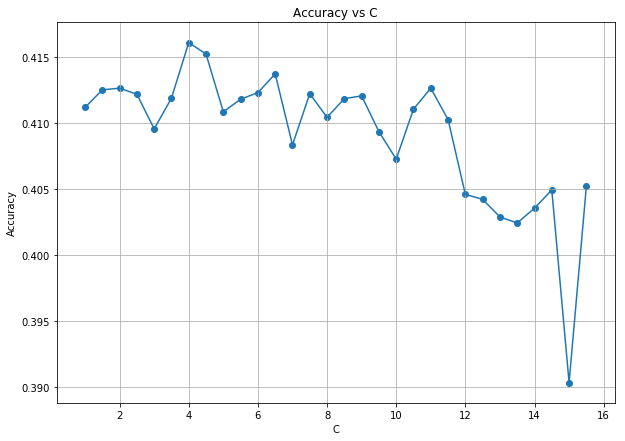

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(c, accuracy)
plt.scatter(c, accuracy)
plt.title('Accuracy vs C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [26]:
cross_val_score(linear_svm_classifier,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)

array([ 0.        ,  0.06125383,  0.04900306,  0.14863429,  0.00218764])

In [28]:
# c = list(np.arange(0.1, 1.0, 0.050))
# accuracy = []
# y_predicted = np.zeros((y_test.shape))
# max_accuracy = 0.0
# linear_svm_classifier = LinearSVC()

# for i in c:
#     classifier = LinearSVC(C = i)
#     classifier.fit(X_train, y_train)
#     predicted_y = classifier.predict(X_test)
#     accuracy.append(np.mean(y_test==predicted_y))
#     print('Accuracy for C = {:.2f} is : {:.4f}'.format(i, accuracy[-1]))
#     if(accuracy[-1] > max_accuracy):
#         y_predicted = predicted_y
#         max_accuracy = accuracy[-1]
#         linear_svm_classifier = classifier
        
# Accuracy for C = 0.10 is : 0.4094
# Accuracy for C = 0.15 is : 0.4097
# Accuracy for C = 0.20 is : 0.4102
# Accuracy for C = 0.25 is : 0.4107
# Accuracy for C = 0.30 is : 0.4106
# Accuracy for C = 0.35 is : 0.4108
# Accuracy for C = 0.40 is : 0.4108
# Accuracy for C = 0.45 is : 0.4108
# Accuracy for C = 0.50 is : 0.4106
# Accuracy for C = 0.55 is : 0.4106
# Accuracy for C = 0.60 is : 0.4102
# Accuracy for C = 0.65 is : 0.4110
# Accuracy for C = 0.70 is : 0.4107
# Accuracy for C = 0.75 is : 0.4107
# Accuracy for C = 0.80 is : 0.4111
# Accuracy for C = 0.85 is : 0.4112
# Accuracy for C = 0.90 is : 0.4120
# Accuracy for C = 0.95 is : 0.4118


#### 3. Poly kernel

In [13]:
poly_classifier = SVC(kernel = 'poly')
poly_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
y_predicted = poly_classifier.predict(X_test)
print('Accuracy: ' + str(np.mean(y_test == y_predicted)))

Accuracy: 0.401850077087


In [15]:
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       0.35      0.22      0.27      5926
          1       0.39      0.55      0.45      6073
          2       0.35      0.39      0.37      6012
          3       0.52      0.45      0.48      5988

avg / total       0.40      0.40      0.39     23999

